[View in Colaboratory](https://colab.research.google.com/github/kamini25singh/assignment/blob/master/assignment_1110.ipynb)

In [0]:
#Question 1
import re
import sklearn as preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [0]:
digit = load_digits()
x= digit.data
y= digit.target

In [35]:
x.shape , y.shape

((1797, 64), (1797,))

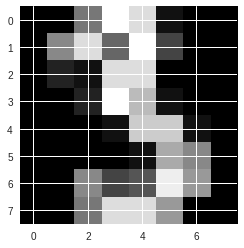

In [36]:
#Question 2
plt.imshow(x[3].reshape(8,8),cmap=plt.cm.gray)

In [0]:
#Question 3
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [38]:
#Question4
reg=LogisticRegression()
reg.fit(x_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
#Question 5
pred=reg.predict(x_test)

In [40]:
result=pd.DataFrame({"Predicted":pred,"Actual":y_test})
result

,Actual,Predicted
0,5,5
1,4,4
2,4,4
3,3,3
4,5,5
5,0,0
6,0,0
7,8,8
8,3,8
9,4,4


In [0]:
from sklearn import model_selection

In [42]:
kfold=model_selection.KFold(n_splits=10,random_state=7)
results=model_selection.cross_val_score(reg,x,y,cv=kfold,scoring="accuracy")
results

array([0.90555556, 0.95      , 0.89444444, 0.91666667, 0.94444444,
       0.97222222, 0.97777778, 0.95530726, 0.8603352 , 0.93854749])

In [43]:
results.sum()

9.31530105524519

In [44]:
results=model_selection.cross_val_score(reg,x,y,cv=kfold,scoring="neg_log_loss")
results

array([-0.45796113, -0.14428745, -0.61735969, -0.27291931, -0.27570248,
       -0.12812984, -0.11026563, -0.12333717, -0.62608068, -0.68630958])

In [46]:
results.sum()/10

-0.3442352960205238

In [47]:
confusion_matrix(y_test,pred)

array([[57,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 57,  1,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 49,  0,  1,  0,  1,  3,  0],
       [ 0,  0,  0,  0, 57,  0,  0,  0,  0,  0],
       [ 0,  2,  1,  1,  0, 48,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 63,  1,  0],
       [ 0,  4,  0,  0,  1,  0,  0,  0, 41,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  3,  3, 52]])

In [48]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        57
          1       0.90      0.97      0.93        59
          2       0.96      1.00      0.98        47
          3       0.94      0.91      0.92        54
          4       0.97      1.00      0.98        57
          5       0.94      0.92      0.93        52
          6       1.00      0.95      0.98        44
          7       0.94      0.98      0.96        64
          8       0.85      0.89      0.87        46
          9       1.00      0.87      0.93        60

avg / total       0.95      0.95      0.95       540



In [49]:
reg1 = LinearRegression()
results=model_selection.cross_val_score(reg1,x,y,cv=kfold,scoring="r2")
results

array([0.40105499, 0.63102463, 0.57072313, 0.59629035, 0.54519634,
       0.67174215, 0.61763556, 0.47611004, 0.4236549 , 0.41044286])

In [50]:
results.sum()/10

0.5343874961263955

In [52]:
results=model_selection.cross_val_score(reg1,x,y,cv=kfold,scoring="neg_mean_absolute_error")
results

array([-1.76232318, -1.33110792, -1.55360439, -1.51943658, -1.50040068,
       -1.30773649, -1.41940728, -1.60049753, -1.62693098, -1.75390435])

In [53]:
results.sum()/10

-1.5375349366952844

In [56]:
results=model_selection.cross_val_score(reg1,x,y,cv=kfold,scoring="neg_mean_squared_error")
results

array([-5.08763116, -2.93563178, -3.5440648 , -3.35720712, -3.61041109,
       -2.77252253, -3.06878144, -4.29164324, -4.76128221, -4.75789407])

In [57]:
results.sum()/10

-3.81870694491852